# Project Introduction:

This project aims to develop a simple Chatbot for Firefox, designed to assist users in discovering safe and high-quality browser extensions from Mozilla's officially curated list of "[Firefox Recommended Extensions.](https://addons.mozilla.org/firefox/search/?promoted=recommended&sort=random&type=extension)" The chatbot will engage with users in a user-friendly, non-technical manner, offering brief and straightforward explanations for each extension it suggests. By adhering to these guidelines, the chatbot will provide a valuable tool for Firefox users while also serving as a valuable contribution for my Outreachy application, fostering my growth in open-source technology development. This Jupyter notebook will document the chatbot's development process and code implementation, demonstrating its functionality and facilitating its future hosting on GitHub.

In [ ]:
# Install the Dependencies
!pip install langchain
!pip install scrapingbee
!pip install python-dotenv
!pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 807.5/807.5 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.6/252.6 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.6/65.6 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.4/227.4 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.4 MB/s eta 0:00:00


In [ ]:
!pip install sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.5/156.5 kB 4.1 MB/s eta 0:00:00


In [ ]:
!pip install "langchain[docarray]"
!pip install pypdf
!pip install tiktoken

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.3/215.3 kB 4.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for hnswlib: filename=hnswlib-0.8.0-cp310-cp310-linux_x86_64.whl size=2287621 sha256=1acf13365202a513791d5e7e58dcca4384cf3cca85ad40ddc3b144d4b758b9f6
  Stored in directory: /root/.cache/pip/wheels/af/a9/3e/3e5d59ee41664eb31a4e6de67d1846f86d16d93c45f277c4e7
Successfully built hnswlib
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.1/286.1 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 10.9 MB/s eta 0:00:00


The code uses the [ScrapingBee API](https://app.scrapingbee.com/dashboard) to send a GET request to the Mozilla Firefox Add-ons website to retrieve data about recommended extensions.
If the request is successful (status code 200), it saves the content to a local file named 'response_content.txt,' making the data available for further processing in the proje

In [ ]:
import requests

# Base URL updated to point to the Euronext Live press release page
# Note: The URL structure for pagination on the Euronext Live website might be different
# This is a hypothetical example and might need adjustments
base_url = "https://live.euronext.com/nb/listview/company-press-releases/1061?page="
num_pages = 5  # Assuming you want to scrape 5 pages

with open('live_euronext_scrapped_data.txt', 'a', encoding='utf-8') as file:
    for page_number in range(1, num_pages + 1):
        url = f"{base_url}{page_number}"
        response = requests.get(url)

        if response.status_code == 200:
            file.write(response.text)
            print(f'Scraped content from page {page_number}')
        else:
            print(f'Failed to retrieve the content for page {page_number}')

print('All scraped data saved to live_euronext_scrapped_data/.txt')


Scraped content from page 1
Scraped content from page 2
Scraped content from page 3
Scraped content from page 4
Scraped content from page 5
All scraped data saved to live_euronext_scrapped_data/.txt


In [ ]:
import requests

# Base URL updated to point to the Oslo Børs NewsWeb search page for a specific issuer
base_url = "https://newsweb.oslobors.no/search?issuer=1642&page="
num_pages = 5  # Adjust based on how many pages you want to scrape

with open('newsweb_oslobors_scrapped_data.txt', 'a', encoding='utf-8') as file:
    for page_number in range(1, num_pages + 1):
        url = f"{base_url}{page_number}"
        response = requests.get(url)

        if response.status_code == 200:
            file.write(response.text)
            print(f'Scraped content from page {page_number}')
        else:
            print(f'Failed to retrieve the content for page {page_number}')

print('All scraped data saved to newsweb_oslobors_scrapped_data.txt')


Scraped content from page 1
Scraped content from page 2
Scraped content from page 3
Scraped content from page 4
Scraped content from page 5
All scraped data saved to newsweb_oslobors_scrapped_data.txt


In [ ]:
from bs4 import BeautifulSoup

# Load the scraped HTML content
with open('all_scraped_data.txt', 'r') as file:
    html_content = file.read()

# Use Beautiful Soup to parse the HTML
soup = BeautifulSoup(html_content, 'html.parser')

# Extract text from the parsed HTML
text = soup.get_text(separator=' ', strip=True)

# Optionally, you can save the cleaned text to a file
with open('cleaned_text.txt', 'w') as output_file:
    output_file.write(text)

print("Text extraction completed.")


Text extraction completed.


In [ ]:
print(7)

7


In [ ]:
ƒimport requests
from bs4 import BeautifulSoup  # BeautifulSoup is used for parsing HTML

base_url = "https://live.euronext.com/nb/listview/company-press-releases/1061?page="
num_pages = 1  # Number of pages you want to scrape

with open('all_scraped_data.txt', 'a', encoding='utf-8') as file:
    for page_number in range(1, num_pages + 1):
        url = f"{base_url}{page_number}"
        response = requests.get(url)

        if response.status_code == 200:
            soup = BeautifulSoup(response.text, 'html.parser')

            # Example: Find all sections that match the IDs you're interested in
            # This is a generic example; you'll need to adjust the search criteria based on the actual HTML structure
            press_releases = soup.find_all(id=lambda x: x and x.startswith('CompanyPressRelease-'))
            for press_release in press_releases:
                # Process each press release section here
                # For example, write its content to a file
                file.write(str(press_release))
                file.write("\n\n")  # Add some space between entries for readability

            print(f'Scraped content from page {page_number}')
        else:
            print(f'Failed to retrieve the content for page {page_number}')

print('All scraped data saved to all_scraped_data.txt')



Scraped content from page 1
All scraped data saved to all_scraped_data.txt


In [ ]:
# We scrape the data from all the 5 pages containing the ads-on
import requests

base_url = "https://addons.mozilla.org/en-US/firefox/search/?promoted=recommended&sort=random&type=extension&page="
num_pages = 5


api_key = 'ZIJEPAD4XS1WFTUF90RIDE77QDSPVNPTIZHTD9XVKWERIBQWXCUPKHPE89722ANYSBKZBTUIL6BEFS9O'
headers = {'Authorization': f'Bearer {api_key}'}

with open('all_scraped_data.txt', 'a', encoding='utf-8') as file:
    for page_number in range(1, num_pages + 1):
        url = f"{base_url}{page_number}"

        response = requests.get(url, headers=headers)

        if response.status_code == 200:
            file.write(response.text)

            print(f'Scraped content from page {page_number}')
        else:
            print(f'Failed to retrieve the content for page {page_number}')

print('All scraped data saved to all_scraped_data.txt')



Scraped content from page 1
Scraped content from page 2
Scraped content from page 3
Scraped content from page 4
Scraped content from page 5
All scraped data saved to all_scraped_data.txt


In [ ]:
file_path = "all_scraped_data.txt"

with open(file_path, "r") as file:
    scraped_data = file.read()

print("Below is our Scrapped Data :")
print(scraped_data)

Below is our Scrapped Data :
<!DOCTYPE html>
<html lang="en-US" dir="ltr"><head><title data-react-helmet="true">Recommended extensions – Add-ons for Firefox (en-US)</title><meta charSet="utf-8"/><meta name="viewport" content="width=device-width, initial-scale=1"/><link href="/static-frontend/Inter-roman-subset-en_de_fr_ru_es_pt_pl_it.var.2ce5ad921c3602b1e5370b3c86033681.woff2" crossorigin="anonymous" rel="preload" as="font" type="font/woff2"/><link href="/static-frontend/amo-20f98379da543d8f44da.css" integrity="sha512-cXUqe5KjmHgGH1Vp5/k8qRKEA1CdwBDGxItQ6Cgz6bXT+Ee2FD9fztlxcuO0E9mJeuQ3Fu8asIi4Kh0Qr5xNMw==" crossorigin="anonymous" rel="stylesheet" type="text/css"/><link rel="shortcut icon" href="/favicon.ico?v=2"/><link data-react-helmet="true" title="Firefox Add-ons" rel="search" type="application/opensearchdescription+xml" href="/en-US/firefox/opensearch.xml"/></head><body><div id="react-view"><div class="Page-amo"><header class="Header"><div class="Notice Notice-warning GetFirefoxBan

# Data Cleaning

We now clean our scraped data using BeautifulSoup, parsing the HTML content from the Firefox Add-ons website. First, we identify all title and about elements, ensuring their quantities match. Then, we iterate through these elements, extracting and printing the title and about information, while handling missing elements for clear and organized data.


In [ ]:
from bs4 import BeautifulSoup


soup = BeautifulSoup(scraped_data, 'html.parser')
title_elements = soup.find_all("h2", class_="SearchResult-name")
about_elements = soup.find_all("p", class_="SearchResult-summary")


if len(title_elements) != len(about_elements):
    print("Mismatch between the number of titles and about sections")

# Loop through and print the titles and about information
for title_element, about_element in zip(title_elements, about_elements):
    title = title_element.a.text.strip() if title_element else "N/A"
    about = about_element.text.strip() if about_element else "N/A"

    print(f"Title: {title}")
    print(f"About: {about}")
    print()

output_file = 'cleaned_data.txt'

with open(output_file, 'w', encoding='utf-8') as file:
    # Loop through and write the titles and about information to the file
    for title_element, about_element in zip(title_elements, about_elements):
        title = title_element.a.text.strip() if title_element else "N/A"
        about = about_element.text.strip() if about_element else "N/A"

        file.write(f"Title: {title}\n")
        file.write(f"About: {about}\n\n")

print(f"Cleaned data saved to {output_file}")


Title: Bitwarden - Free Password Manager
About: A secure and free password manager for all of your devices.

Title: Private Bookmarks
About: Enables a password-protected bookmark folder.

Title: Simple Tab Groups
About: Create, modify, and quickly change tab groups

Title: Dictionary Anywhere
About: View definitions easily as you browse the web. Double-click any word to view its definition in a small pop-up bubble. It also supports Spanish, German, French language alongside English. Enjoy Reading Uninterrupted!!!.

Title: Grammar and Spell Checker - LanguageTool
About: With this extension you can check text with the free style and grammar checker LanguageTool. It finds many errors that a simple spell checker cannot detect, like mixing up there/their, a/an, or repeating a word.

Title: Metastream Remote
About: Watch streaming media with friends.

Title: Download Manager (S3)
About: View and manage downloads from a tidy status bar.

Title: ClearURLs
About: Removes tracking elements from 

# Creating a Vector Database for Chatbot

__Step 1: Convert Data to PDF__

To prepare the data for vectorization, We convert the "cleaned_data.txt" file into a PDF format so we can utilize Langchain `PyPDFLoader` function (Note, We can also use other data formats). To convert the `.txt` file to `.pdf` file we are going to use free online tools like "https://www.sodapdf.com/txt-to-pdf/." Upload the text file and use the tool to generate a PDF file, which is a more suitable format for further processing.

__Step 2: Split Documents with TextSplitter__

After obtaining the PDF file, the next step is to split the document into smaller units. This is achieved using a tool like Langchain's `TextSplitter` function. Splitting the document is useful for tasks like fitting text into a model's context window, creating sliding windows, and maintaining continuity between chunks.

__Step 3: Create Embeddings and Store in Vector Database__

Once the document is split, the final step is to create embeddings for each section. Embeddings are numerical representations of text that can be used for various natural language processing tasks, including chatbot responses. These embeddings are generated for each section and then stored in a vector database, which enables quick and efficient retrieval of information based on user queries. The database can be implemented using suitable libraries or frameworks, ensuring that the chatbot can access the embeddings for generating responses to user inquiries.

In [ ]:
import os
import openai
import tempfile
from langchain.llms import OpenAI
from langchain.chat_models import ChatOpenAI
from langchain.memory import ConversationSummaryMemory
from langchain.document_loaders import PyPDFLoader
from langchain.memory import ConversationBufferMemory
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.callbacks.base import BaseCallbackHandler
from langchain.chains import ConversationalRetrievalChain
from langchain.vectorstores import DocArrayInMemorySearch
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.prompts.prompt import PromptTemplate

#llm = ChatOpenAI()

#!echo "OPENAI_API_KEY=enter_your_key" > .env

#from dotenv import load_dotenv, find_dotenv
#_ = load_dotenv(find_dotenv()) # read local .env file

os.environ['OPENAI_API_KEY'] = "enter_your_key"
openai_api_key = "enter_your_key"

In [ ]:
def configure_qa_chain(uploaded_files):
    # Read documents
    loader = PyPDFLoader("sodapdf-converted.pdf")

    # Split documents
    #text_splitter = RecursiveCharacterTextSplitter(chunk_size=1500, chunk_overlap=200)
    #splits = text_splitter.split_documents(loader)
    splits = loader.load_and_split()
    # Create embeddings and store in vectordb
    embeddings = HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")
    vectordb = DocArrayInMemorySearch.from_documents(splits, embeddings)

    # Define retriever
    retriever = vectordb.as_retriever(search_type="mmr", search_kwargs={"k": 2, "fetch_k": 4})

    # Setup memory for contextual conversation
    memory = ConversationBufferMemory(memory_key="chat_history", return_messages=True)

    # Setup LLM and QA chain
    llm = ChatOpenAI(
        model_name="gpt-3.5-turbo-0613", openai_api_key=openai_api_key, temperature=0, streaming=True
    )
    qa_chain = ConversationalRetrievalChain.from_llm(
        llm, retriever=retriever, memory=memory, verbose=True
    )
    return qa_chain

In [ ]:
from langchain.chains import LLMChain


def configure_qa_chain(uploaded_files):
    # Read documents
    loader = PyPDFLoader("sodapdf-converted.pdf")

    # Split documents
    #text_splitter = RecursiveCharacterTextSplitter(chunk_size=1500, chunk_overlap=200)
    #splits = text_splitter.split_documents(loader)
    splits = loader.load_and_split()
    # Create embeddings and store in vectordb
    embeddings = HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")
    vectordb = DocArrayInMemorySearch.from_documents(splits, embeddings)

    # Define retriever
    retriever = vectordb.as_retriever(search_type="mmr", search_kwargs={"k": 2, "fetch_k": 4})

    # Setup memory for contextual conversation
    memory = ConversationBufferMemory(memory_key="chat_history", return_messages=True)

    # Define the prompt template
    template = """ You are a helpful assistant that suggests safe, high quality browser extensions to users of the Firefox desktop browser.
    You exclusively suggest extensions from Mozilla’s officially curated list of “Firefox Recommended Extensions”
    because they are known to be safe and high quality. Provide brief and simple explanations to users for each of your extension suggestions.
    Never suggest more than three or four extensions. Avoid technical jargon. Assume users know very little about browser extensions or technology in general.
    Don’t engage in any conversation topic not related to helping Firefox users find safe, h
    igh quality “Recommended Extensions.” Also provide extension download link If a user tries to converse with you on any subject other than Firefox browser extensions — for instance,
    if they ask for medical advice, seek your opinion on relationships, politics, etc. — just politely apologize and let them know you’re only trained to be an expert on Firefox extensions.

    Chat History:
    {chat_history}
    Follow Up Input: {question}
    Standalone question:"""
    prompt = PromptTemplate.from_template(template)

    # Setup LLM and QA chain with prompt
    llm = ChatOpenAI(
        model_name="gpt-3.5-turbo-0613", openai_api_key=openai_api_key, temperature=0, streaming=True
    )

    qa_chain = LLMChain(prompt=prompt, llm=llm, memory=memory, verbose=True)
    #qa_chain = ConversationalRetrievalChain.from_llm(prompt=prompt, llm=llm, retriever=retriever, memory=memory, verbose=True)

    return qa_chain



In [ ]:
# we now pass on our data to the "configure_qa_chain" function for processing
qa_chain = configure_qa_chain("sodapdf-converted.pdf")

In [ ]:
qa_chain.run("Which Add-Ons best for Save frequently-entered text for pasting later")



> Entering new StuffDocumentsChain chain...


> Entering new LLMChain chain...
Prompt after formatting:
System: Use the following pieces of context to answer the users question. 
If you don't know the answer, just say that you don't know, don't try to make up an answer.
----------------
Title: Tomato Clock 
About: Tomato Clock is a simple browser extension that helps with online time management. 
 
Title: History Cleaner 
About: Deletes browsing history older than a specified number of days. 
 
Title: Cookie AutoDelete 
About: Control your cookies! This WebExtension is inspired by Self Destructing Cookies. When a tab clos
es, any cookies not being used are automatically deleted. Keep the ones you trust (forever/until restart) w
hile deleting the rest. Containers Supported 
 
Title: OneTab 
About: OneTab - Too many tabs? Convert tabs to a list and reduce browser memory 
 
Title: Clippings 
About: Save frequently-entered text for pasting later. 
 
Title: YouTube NonStop 
About: Tired o

'The best Ads-On for saving frequently-entered text for pasting later is "Clippings."'

In [ ]:
import os
import tempfile
from langchain.chat_models import ChatOpenAI
from langchain.document_loaders import PyPDFLoader
from langchain.memory import ConversationBufferMemory
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.callbacks.base import BaseCallbackHandler
from langchain.chains import ConversationalRetrievalChain
from langchain.vectorstores import DocArrayInMemorySearch
from langchain.text_splitter import RecursiveCharacterTextSplitter

# Your OpenAI API key
#openai_api_key = 'YOUR_OPENAI_API_KEY'

def configure_qa_chain(uploaded_files):
    # Read documents
    docs = []
    temp_dir = tempfile.TemporaryDirectory()
    for file in uploaded_files:
        temp_filepath = os.path.join(temp_dir.name, file.name)
        with open(temp_filepath, "wb") as f:
            f.write(file.getvalue())
        loader = PyPDFLoader(temp_filepath)
        docs.extend(loader.load())

    # Split documents
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=1500, chunk_overlap=200)
    splits = text_splitter.split_documents(docs)

    # Create embeddings and store in vectordb
    embeddings = HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")
    vectordb = DocArrayInMemorySearch.from_documents(splits, embeddings)

    # Define retriever
    retriever = vectordb.as_retriever(search_type="mmr", search_kwargs={"k": 2, "fetch_k": 4})

    # Setup memory for contextual conversation
    memory = ConversationBufferMemory(memory_key="chat_history", return_messages=True)

    # Setup LLM and QA chain
    llm = ChatOpenAI(
        model_name="gpt-3.5-turbo-0613", openai_api_key=openai_api_key, temperature=0, streaming=True
    )
    qa_chain = ConversationalRetrievalChain.from_llm(
        llm, retriever=retriever, memory=memory, verbose=True
    )
    return qa_chain

qa_chain = configure_qa_chain(uploaded_files)

user_query = '''
You are a helpful assistant that suggests safe, high-quality browser extensions to users of the Firefox desktop browser.
You exclusively suggest extensions from Mozilla’s officially curated list of “Firefox Recommended Extensions”
because they are known to be safe and high quality. Provide brief and simple explanations to users for each of your extension suggestions.
Never suggest more than three or four extensions. Avoid technical jargon. Assume users know very little about browser extensions or technology in general.
Don’t engage in any conversation topic not related to helping Firefox users find safe, high-quality “Recommended Extensions.” Also provide extension download link. If a user tries to converse with you on any subject other than Firefox browser extensions — for instance, if they ask for medical advice, seek your opinion on relationships, politics, etc. — just politely apologize and let them know you’re only trained to be an expert on Firefox extensions.
'''

user_queries = [
    user_query,
    "User query 1",
    "User query 2",
    # Add more user queries here
]

for query in user_queries:
    with retrieval_handler, stream_handler:
        response = qa_chain.run(query)
        print(f"User Query: {query}")
        print("Assistant Response:", response)


In [ ]:
! pip install pypdf

In [ ]:
from langchain.document_loaders import PyPDFLoader
loader = PyPDFLoader("docs/cs229_lectures/MachineLearning-Lecture01.pdf")
pages = loader.load()

In [ ]:
#pip install playwright
!pip install nest_asyncio
import nest_asyncio
nest_asyncio.apply()


In [ ]:
from langchain.chains import create_extraction_chain

schema = {
    "properties": {
        "news_article_title": {"type": "string"},
        "news_article_summary": {"type": "string"},
    },
    "required": ["news_article_title", "news_article_summary"],
}

def extract(content: str, schema: dict):
    return create_extraction_chain(schema=schema, llm=llm).run(content)

In [ ]:
from langchain.document_loaders import WebBaseLoader

loader = WebBaseLoader("https://live.euronext.com/nb/listview/company-press-releases/1061?page=1")
data = loader.load()

In [ ]:
data

[Document(page_content="\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nCompany press releases | Euronext Live kurser\n\n\n\n\n\n\n\n\n\n\n\n\n\n      Hopp til hovedinnhold\n    \n\n\n\n\n\n\n\n\n\n\nToggle navigation\n\n\n\n\n\n\n\n\n\nLive markets\n\n\n\n \n\n\n\n\n\n\n\n\n\n\nSearch\n\n\n\n\n\n\n\nSearch\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nSearch\n\n\n\n\n\n\n\nSearch\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nMy profile\n\n\nMy Subscriptions\n\n\nWatchlists\n\n\nQuote alerts\n\n\nCreate account\n\n\nSign in\n\n\n\n\n\n\n\n\n\n\n\n\n\nNB\n\n\n FR \n EN \n PT \n NL \n NB \n DE \n IT \n\n\n\n\n\n\n\n\n\n\nCompany press releases\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nAbonner\n\n\n\n\t\t\t\t\t\t\tFiltre\n\t\t\t\t\t\t\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\t\t\t\t\t\t\t\t\t\t\t\t\tFiltre\n\t\t\t\t\t\t\t\t\t\t\t\t\n\n\n\t\t\t\t\t\t\t\t\t\t\t\t\t\tOppdater\n\t\t\t\t\t\t\t\t\t\t\t\t\t\n\n\t\t\t\t\t\t\t\t\t\t\t\t\t\tNullstill\n\t\t\t\t\t\t\t\t\t\t\t\t\t\n\n\n\n\n\n\n\nIcon After\n\n\n\n\n\n\n\n\

In [ ]:
pip install langchain openai chromadb langchainhub

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 525.5/525.5 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 31.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.7/105.7 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 7.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 698.9/698.9 kB 4

In [ ]:
pip install tiktoken

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=0)
all_splits = text_splitter.split_documents(data)

from langchain.embeddings import OpenAIEmbeddings
from langchain.vectorstores import Chroma

vectorstore = Chroma.from_documents(documents=all_splits, embedding=OpenAIEmbeddings())

RateLimitError: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}

In [ ]:
memory = ConversationSummaryMemory(llm=llm,memory_key="chat_history",return_messages=True)

In [ ]:
from langchain.chat_models import ChatOpenAI
from langchain.chains import ConversationalRetrievalChain

llm = ChatOpenAI()
retriever = vectorstore.as_retriever()
qa = ConversationalRetrievalChain.from_llm(llm, retriever=retriever, memory=memory)

In [ ]:
qa("what is TinEye Reverse Image Search")

{'question': 'what is TinEye Reverse Image Search',
 'chat_history': [SystemMessage(content="The human asks the AI to provide a link for installing TinEye Reverse Image Search. The AI apologizes for not having internet access but suggests searching for the extension in the browser's add-on store.")],
 'answer': "I don't know."}

In [ ]:
qa('provide me with a link for installing TinEye Reverse Image Search')

{'question': 'provide me with a link for installing TinEye Reverse Image Search',
 'chat_history': [SystemMessage(content='')],
 'answer': 'Sorry, I don\'t have access to the internet to provide you with a link. However, you can search for "TinEye Reverse Image Search" in your favorite browser\'s add-on store to find and install the extension.'}

In [ ]:
# Prompt
# https://smith.langchain.com/hub/rlm/rag-prompt

from langchain import hub
rag_prompt = hub.pull("rlm/rag-prompt")

In [ ]:
from langchain.chat_models import ChatOpenAI
llm = ChatOpenAI(model_name="gpt-3.5-turbo", temperature=0)

from langchain.schema.runnable import RunnablePassthrough
rag_chain = (
    {"context": retriever, "question": RunnablePassthrough()}
    | rag_prompt
    | llm
)

rag_chain.invoke("what extension can use to listen to live fm radio")

AIMessage(content="I don't know.")

In [ ]:
question = "what extension can use to listen to live fm radio"

In [ ]:
import logging
from langchain.chat_models import ChatOpenAI
from langchain.retrievers.multi_query import MultiQueryRetriever

logging.basicConfig()
logging.getLogger('langchain.retrievers.multi_query').setLevel(logging.INFO)

retriever_from_llm = MultiQueryRetriever.from_llm(retriever=vectorstore.as_retriever(),
                                                  llm=ChatOpenAI(temperature=0))
unique_docs = retriever_from_llm.get_relevant_documents(query=question)
len(unique_docs)

INFO:langchain.retrievers.multi_query:Generated queries: ['1. Which file format can be used to stream live FM radio?', '2. Are there any specific file extensions that support live FM radio streaming?', '3. What file extension should I look for to access live FM radio broadcasts?']


6

In [ ]:
from langchain.retrievers import SVMRetriever

svm_retriever = SVMRetriever.from_documents(all_splits,OpenAIEmbeddings())
docs_svm=svm_retriever.get_relevant_documents(question)
len(docs_svm)

4

In [ ]:
from langchain.prompts import PromptTemplate

template = """You are a helpful assistant that suggests safe, high quality browser extensions to users of the Firefox desktop browser.
You exclusively suggest extensions from Mozilla’s officially curated list of “Firefox Recommended Extensions”
because they are known to be safe and high quality. Provide brief and simple explanations to users for each of your extension suggestions.
Never suggest more than three or four extensions. Avoid technical jargon. Assume users know very little about browser extensions or technology in general.
Don’t engage in any conversation topic not related to helping Firefox users find safe, h
igh quality “Recommended Extensions.” Also provide extension download link If a user tries to converse with you on any subject other than Firefox browser extensions — for instance,
if they ask for medical advice, seek your opinion on relationships, politics, etc. — just politely apologize and let them know you’re only trained to be an expert on Firefox extensions.
{context}
Question: {question}
Helpful Answer:"""
rag_prompt_custom = PromptTemplate.from_template(template)

rag_chain = (
    {"context": retriever, "question": RunnablePassthrough()}
    | rag_prompt_custom
    | llm
)

rag_chain.invoke("What can I use to remove ads?")

AIMessage(content='You can use the "AdBlocker Ultimate" extension. It completely removes all ads, including "acceptable" ads or whitelisted advertisers. It also helps block trackers and malware. You can download it here: [AdBlocker Ultimate](https://addons.mozilla.org/en-US/firefox/addon/adblocker-ultimate/)')

In [ ]:
rag_chain.invoke("what can i use to remove history?")

AIMessage(content='You can use the "History Cleaner" extension to delete your browsing history. It allows you to specify a certain number of days, and it will automatically delete any history older than that. It\'s a great way to keep your browsing history clean and private. You can download it here: [History Cleaner Extension](https://addons.mozilla.org/en-US/firefox/addon/history-cleaner/)')

In [ ]:
from langchain.document_loaders import AsyncHtmlLoader
urls = ["https://newsweb.oslobors.no/", "https://newsweb.oslobors.no/message/612683"]
loader = AsyncHtmlLoader(urls)
docs = loader.load()

Fetching pages: 100%|##########| 2/2 [00:00<00:00,  6.99it/s]


In [ ]:
from langchain.chat_models import ChatOpenAI
llm = ChatOpenAI(temperature=0, model="gpt-3.5-turbo-0613")

In [ ]:
from langchain.chains import create_extraction_chain

schema = {
    "properties": {
        "Ads-On title": {"type": "string"},
        "Ads-On summary": {"type": "string"},
        "Ads-On link": {"type": "string"},
    },
    "required": ["Ads-On title", "Ads-On summary", "Ads-On link"],
}

def extract(content: str, schema: dict):
    return create_extraction_chain(schema=schema, llm=llm).run(content)

In [ ]:
pip install nest_asyncio


In [ ]:
!playwright install



153.1 Mb [] 0% 0.0s153.1 Mb [] 0% 22.5s153.1 Mb [] 0% 15.9s153.1 Mb [] 0% 8.7s153.1 Mb [] 0% 6.9s153.1 Mb [] 1% 5.9s153.1 Mb [] 1% 5.4s153.1 Mb [] 2% 4.9s153.1 Mb [] 2% 4.6s153.1 Mb [] 3% 4.4s153.1 Mb [] 3% 4.5s153.1 Mb [] 4% 4.6s153.1 Mb [] 5% 4.6s153.1 Mb [] 5% 4.4s153.1 Mb [] 6% 4.5s153.1 Mb [] 7% 4.2s153.1 Mb [] 7% 4.1s153.1 Mb [] 8% 4.0s153.1 Mb [] 9% 4.0s153.1 Mb [] 9% 3.8s153.1 Mb [] 10% 3.7s153.1 Mb [] 11% 3.6s153.1 Mb [] 11% 3.5s153.1 Mb [] 12% 3.4s153.1 Mb [] 12% 3.3s153.1 Mb [] 13% 3.4s153.1 Mb [] 13% 3.2s153.1 Mb [] 15% 3.0s153.1 Mb [] 16% 2.9s153.1 Mb [] 17% 2.8s153.1 Mb [] 19% 2.6s153.1 Mb [] 20% 2.5s153.1 Mb [] 21% 2.4s153.1 Mb [] 22% 2.4s153.1 Mb [] 23% 2.4s153.1 Mb [] 23% 2.3s153.1 Mb [] 24% 2.4s153.1 Mb [] 24% 2.3s153.1 Mb [] 25% 2.3s153.1 Mb [] 27% 2.2s153.1 Mb [] 28% 2.1s153.1 Mb [] 29% 2.0s153.1 Mb [] 30% 2.0s153.1 Mb [] 31% 1.9s153.1 Mb [] 32% 1.9s153.1 Mb [] 34% 1.8s153.1 Mb [] 35% 1.7s153.1 Mb [] 36% 1.7s153.1 Mb [] 37% 1.7s153.1 Mb [] 37% 1.6s153.1 Mb [] 39% 1.

In [ ]:
pip install fpdf2

In [ ]:
from fpdf import FPDF

def text_to_pdf(input_file, output_file):
    pdf = FPDF()
    pdf.add_page()
    pdf.set_font("Arial", size=12)

    try:
        with open(input_file, "r") as txt_file:
            lines = txt_file.readlines()
            for line in lines:
                pdf.cell(200, 10, txt=line, ln=True)

        pdf.output(output_file)
        print(f"Conversion complete. Output saved to {output_file}")
    except Exception as e:
        print(f"An error occurred: {str(e)}")

# Replace these file paths with your input and output file paths
input_txt_file = "clean_page1.txt"
output_pdf_file = "clean_page1.pdf"

text_to_pdf(input_txt_file, output_pdf_file)


An error occurred: Character "“" at index 37 in text is outside the range of characters supported by the font used: "helvetica". Please consider using a Unicode font.


<ipython-input-32-5effc8ba9007>:6: UserWarning: Substituting font arial by core font helvetica
  pdf.set_font("Arial", size=12)
<ipython-input-32-5effc8ba9007>:12: DeprecationWarning: The parameter "txt" has been renamed to "text" in 2.7.6
  pdf.cell(200, 10, txt=line, ln=True)
<ipython-input-32-5effc8ba9007>:12: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=True use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  pdf.cell(200, 10, txt=line, ln=True)


In [ ]:
from fpdf import FPDF

def text_to_pdf(input_file, output_file):
    pdf = FPDF()
    pdf.add_page()

    # Specify the path to your Unicode TTF font file
    font_path = "your_unicode_font.ttf"

    pdf.add_font("YourUnicodeFont", fname=font_path, uni=True)
    pdf.set_font("YourUnicodeFont", size=12)

    try:
        with open(input_file, "r", encoding="utf-8") as txt_file:
            lines = txt_file.readlines()
            for line in lines:
                pdf.multi_cell(190, 10, txt=line)

        pdf.output(output_file)
        print(f"Conversion complete. Output saved to {output_file}")
    except Exception as e:
        print(f"An error occurred: {str(e)}")  # Fix the syntax error here

# Replace these file paths with your input and output file paths
input_txt_file = "clean_page1.txt"  # Update with the correct file path
output_pdf_file = "output.pdf"  # Update with the desired output file name

text_to_pdf(input_txt_file, output_pdf_file)



<ipython-input-36-1e9478c2518f>:10: DeprecationWarning: "uni" parameter is deprecated since v2.5.1, unused and will soon be removed
  pdf.add_font("YourUnicodeFont", fname=font_path, uni=True)


FileNotFoundError: ignored

In [ ]:
!pip install FPDF

# version 2

In [ ]:
!pip install "langchain[docarray]"
!pip install pypdf
!pip install tiktoken

In [ ]:
from langchain.embeddings.openai import OpenAIEmbeddings
from langchain.text_splitter import CharacterTextSplitter, RecursiveCharacterTextSplitter
from langchain.vectorstores import DocArrayInMemorySearch
from langchain.document_loaders import TextLoader
from langchain.chains import RetrievalQA,  ConversationalRetrievalChain
from langchain.memory import ConversationBufferMemory
from langchain.chat_models import ChatOpenAI
from langchain.document_loaders import TextLoader
from langchain.document_loaders import PyPDFLoader

In [ ]:
def load_db(file, chain_type, k):
    # load documents
    loader = PyPDFLoader(file)
    documents = loader.load()
    # split documents
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=150)
    docs = text_splitter.split_documents(documents)
    # define embedding
    embeddings = OpenAIEmbeddings()
    # create vector database from data
    db = DocArrayInMemorySearch.from_documents(docs, embeddings)
    # define retriever
    retriever = db.as_retriever(search_type="similarity", search_kwargs={"k": k})
    # create a chatbot chain. Memory is managed externally.
    llm_name = "gpt-4"
    qa = ConversationalRetrievalChain.from_llm(
        llm=ChatOpenAI(model_name=llm_name, temperature=0),
        chain_type=chain_type,
        retriever=retriever,
        return_source_documents=True,
        return_generated_question=True,
    )
    return qa

In [ ]:
import panel as pn
import param

class cbfs(param.Parameterized):
    chat_history = param.List([])
    answer = param.String("")
    db_query  = param.String("")
    db_response = param.List([])

    def __init__(self,  **params):
        super(cbfs, self).__init__( **params)
        self.panels = []
        self.loaded_file = "sodapdf-converted.pdf"
        self.qa = load_db(self.loaded_file,"stuff", 4)

    def call_load_db(self, count):
        if count == 0 or file_input.value is None:  # init or no file specified :
            return pn.pane.Markdown(f"Loaded File: {self.loaded_file}")
        else:
            file_input.save("temp.pdf")  # local copy
            self.loaded_file = file_input.filename
            button_load.button_style="outline"
            self.qa = load_db("temp.pdf", "stuff", 4)
            button_load.button_style="solid"
        self.clr_history()
        return pn.pane.Markdown(f"Loaded File: {self.loaded_file}")

    def convchain(self, query):
        if not query:
            return pn.WidgetBox(pn.Row('User:', pn.pane.Markdown("", width=600)), scroll=True)
        result = self.qa({"question": query, "chat_history": self.chat_history})
        self.chat_history.extend([(query, result["answer"])])
        self.db_query = result["generated_question"]
        self.db_response = result["source_documents"]
        self.answer = result['answer']
        self.panels.extend([
            pn.Row('User:', pn.pane.Markdown(query, width=600)),
            pn.Row('ChatBot:', pn.pane.Markdown(self.answer, width=600, styles={'background-color': '#F6F6F6'}))
        ])
        inp.value = ''  #clears loading indicator when cleared
        return pn.WidgetBox(*self.panels,scroll=True)

    @param.depends('db_query ', )
    def get_lquest(self):
        if not self.db_query :
            return pn.Column(
                pn.Row(pn.pane.Markdown(f"Last question to DB:", styles={'background-color': '#F6F6F6'})),
                pn.Row(pn.pane.Str("no DB accesses so far"))
            )
        return pn.Column(
            pn.Row(pn.pane.Markdown(f"DB query:", styles={'background-color': '#F6F6F6'})),
            pn.pane.Str(self.db_query )
        )

    @param.depends('db_response', )
    def get_sources(self):
        if not self.db_response:
            return
        rlist=[pn.Row(pn.pane.Markdown(f"Result of DB lookup:", styles={'background-color': '#F6F6F6'}))]
        for doc in self.db_response:
            rlist.append(pn.Row(pn.pane.Str(doc)))
        return pn.WidgetBox(*rlist, width=600, scroll=True)

    @param.depends('convchain', 'clr_history')
    def get_chats(self):
        if not self.chat_history:
            return pn.WidgetBox(pn.Row(pn.pane.Str("No History Yet")), width=600, scroll=True)
        rlist=[pn.Row(pn.pane.Markdown(f"Current Chat History variable", styles={'background-color': '#F6F6F6'}))]
        for exchange in self.chat_history:
            rlist.append(pn.Row(pn.pane.Str(exchange)))
        return pn.WidgetBox(*rlist, width=600, scroll=True)

    def clr_history(self,count=0):
        self.chat_history = []
        return

Column
    [0] Row
        [0] Markdown(str)
    [1] Row
        [0] Image(str, width=100)
    [2] Tabs
        [0] Column
            [0] Row
                [0] TextInput(placeholder='Enter text here…')
            [1] Divider()
            [2] ParamFunction(function, _pane=WidgetBox, defer_load=False, height=300, loading_indicator=True)
            [3] Divider()
        [1] Column
            [0] ParamMethod(method, _pane=Column, defer_load=False)
            [1] Divider()
            [2] ParamMethod(method, _pane=Str, defer_load=False)
        [2] Column
            [0] ParamMethod(method, _pane=WidgetBox, defer_load=False)
            [1] Divider()
        [3] Column
            [0] Row
                [0] FileInput(accept='.pdf')
                [1] Button(button_type='primary', name='Load DB')
                [2] ParamFunction(function, _pane=Markdown, defer_load=False)
            [1] Row
                [0] Button(button_type='warning', name='Clear History')
                [1] Markdown(str)
            [2] Divider()
            [3] Row
                [0] Image(str, width=400)
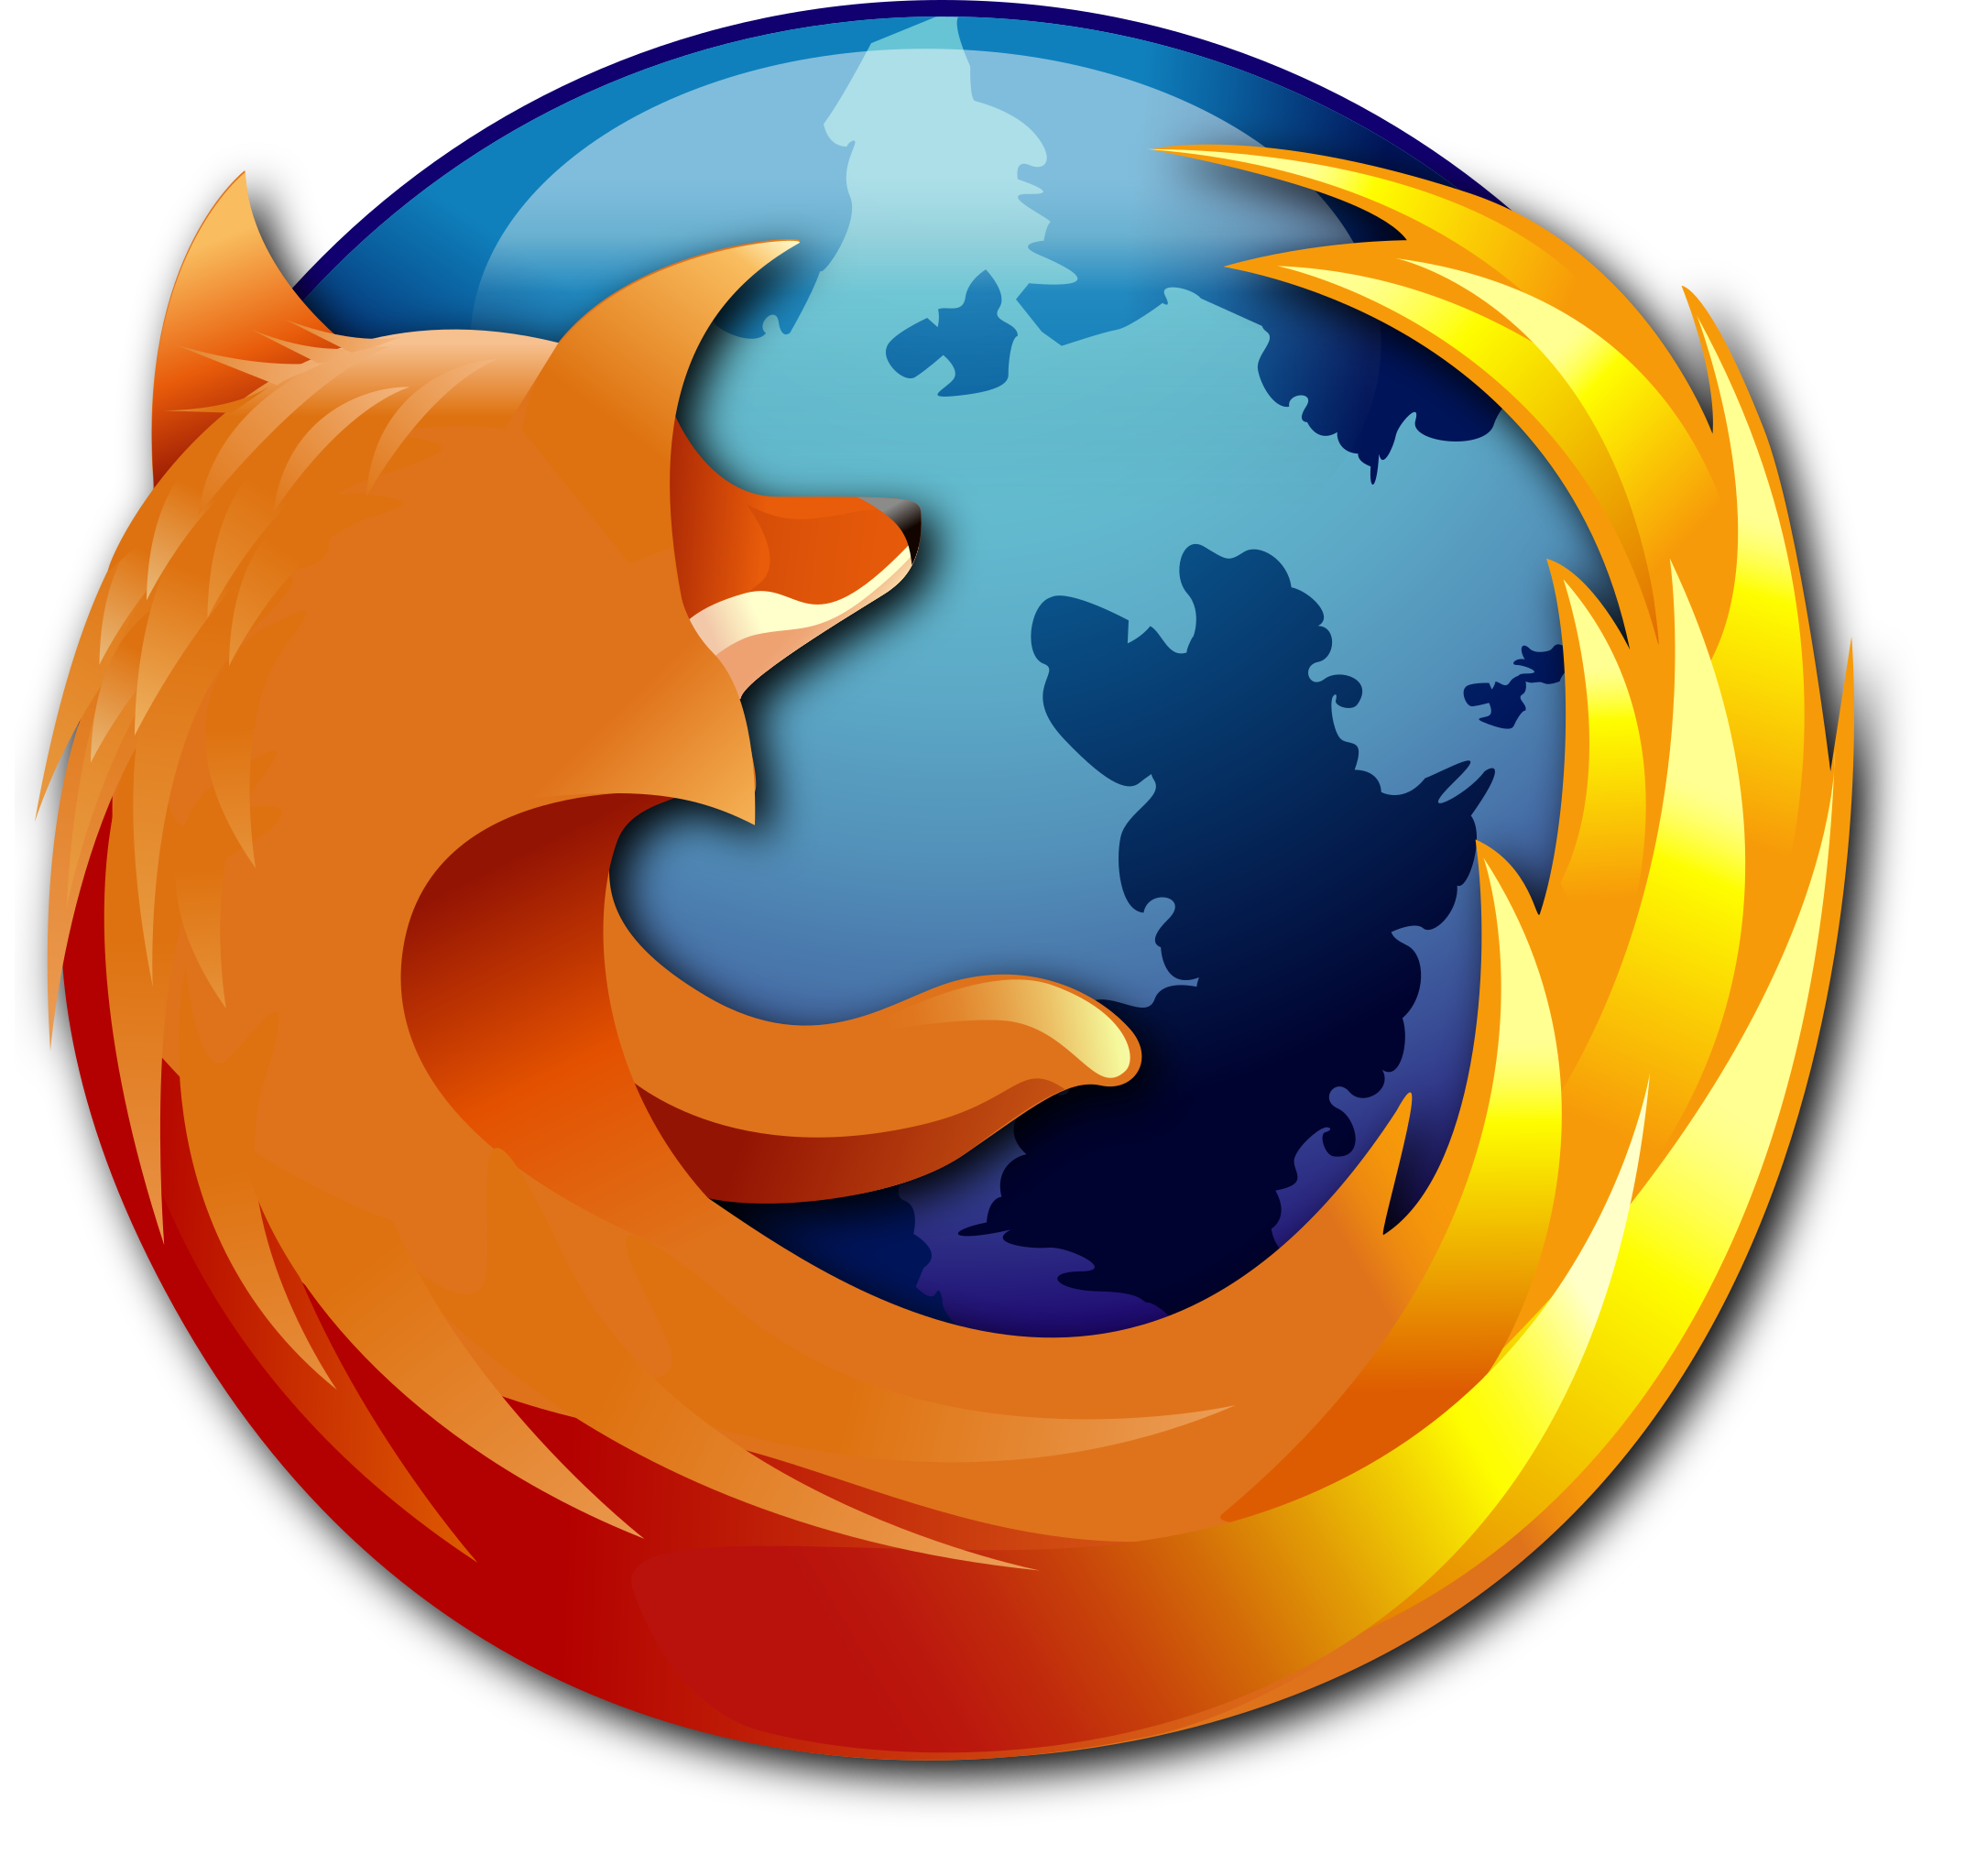
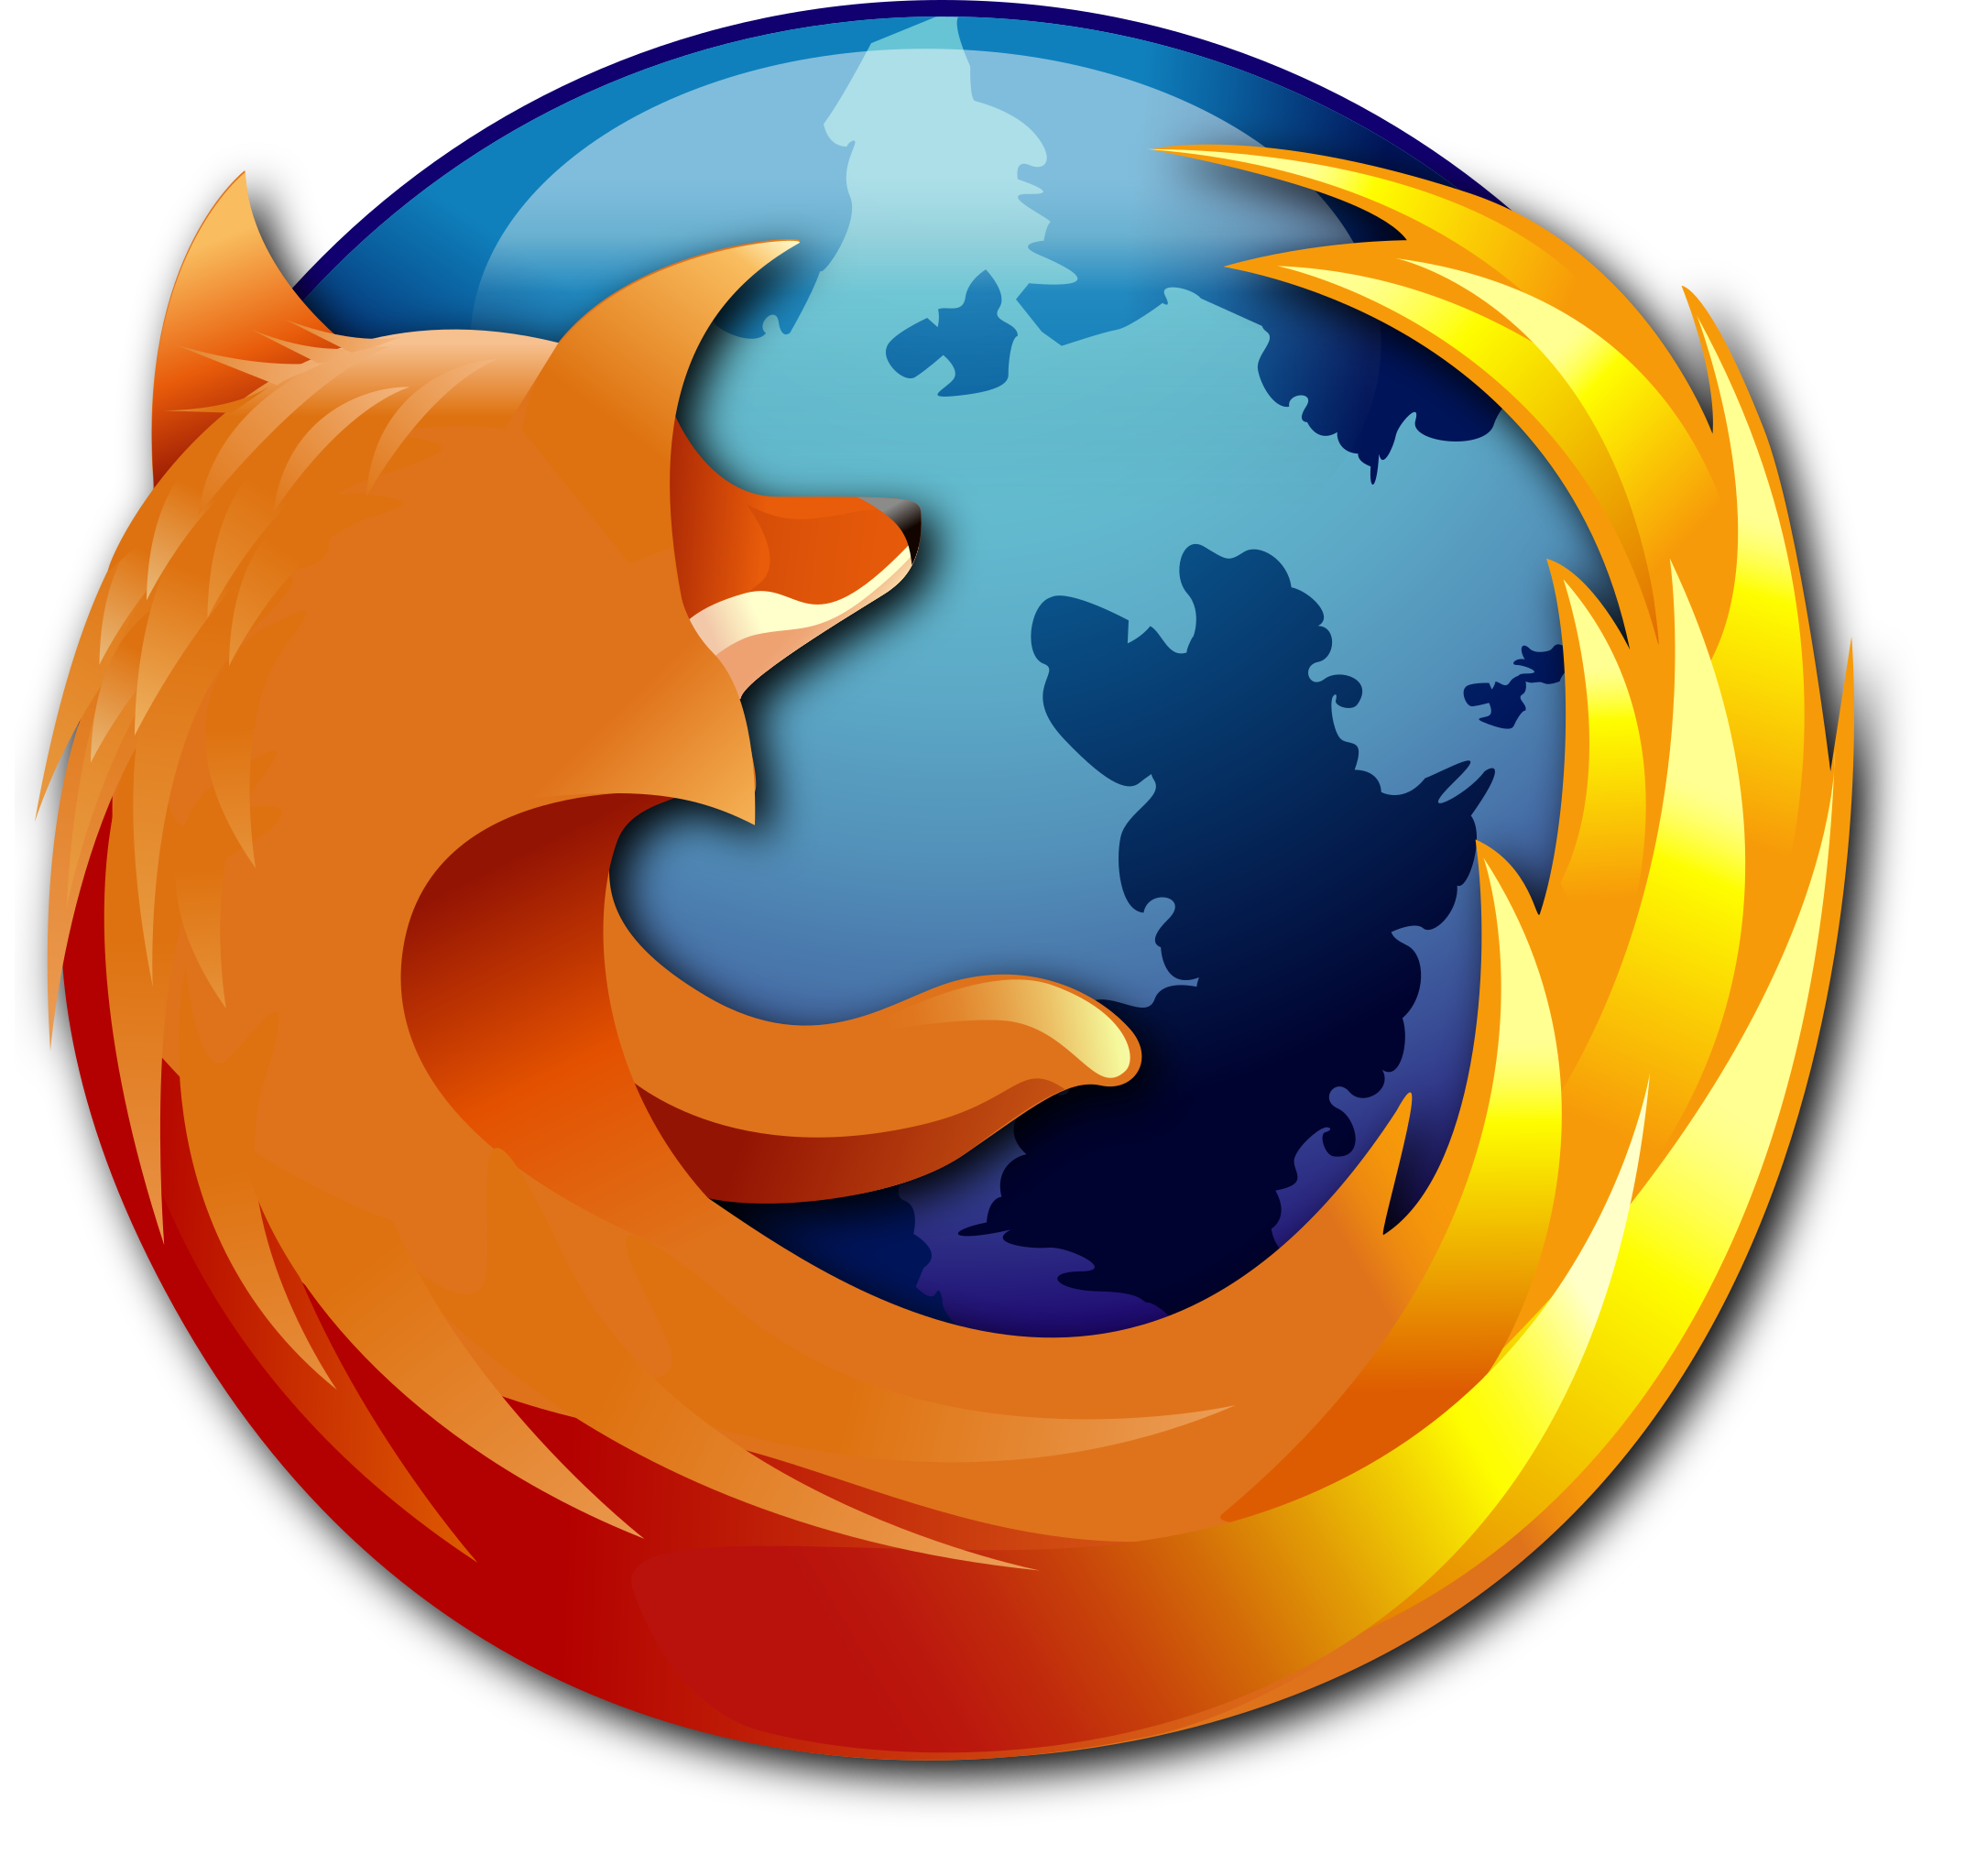

In [ ]:
cb = cbfs()
pn.extension()
file_input = pn.widgets.FileInput(accept='.pdf')
button_load = pn.widgets.Button(name="Load DB", button_type='primary')
button_clearhistory = pn.widgets.Button(name="Clear History", button_type='warning')
button_clearhistory.on_click(cb.clr_history)
inp = pn.widgets.TextInput( placeholder='Enter text here…')

bound_button_load = pn.bind(cb.call_load_db, button_load.param.clicks)
conversation = pn.bind(cb.convchain, inp)

jpg_pane = pn.pane.Image( 'Firefox.png')

tab1 = pn.Column(
    pn.Row(inp),
    pn.layout.Divider(),
    pn.panel(conversation,  loading_indicator=True, height=300),
    pn.layout.Divider(),
)
tab2= pn.Column(
    pn.panel(cb.get_lquest),
    pn.layout.Divider(),
    pn.panel(cb.get_sources ),
)
tab3= pn.Column(
    pn.panel(cb.get_chats),
    pn.layout.Divider(),
)
tab4=pn.Column(
    pn.Row( file_input, button_load, bound_button_load),
    pn.Row( button_clearhistory, pn.pane.Markdown("Clears chat history. Can use to start a new topic" )),
    pn.layout.Divider(),
    pn.Row(jpg_pane.clone(width=400))
)
dashboard = pn.Column(
    pn.Row(pn.pane.Markdown('# Firefox_Bot')),
    pn.Row(jpg_pane.clone(width=100)),
    pn.Tabs(('Conversation', tab1), ('Database', tab2), ('Chat History', tab3),('Configure', tab4)),
)
dashboard